<a href="https://colab.research.google.com/github/Malikarbaaz/YES_BANK_CLOSE_PRICE_PREDICTION/blob/main/Yes_Bank_MLProject_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title :-  </u></b> <b> YES BANK STOCK CLOSING PRICE PREDICTION. <b>

#**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the |bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.** 


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'

In [4]:
# Reading our Dataset
data = pd.read_csv(file_path)

In [5]:
# head gives the top 5 rows of the given dataset
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [8]:
#set date as index
data.set_index('Date',inplace=True)

In [9]:
data.head(3)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30


In [10]:
# Creating a copy of dataframe
df = data.copy()

## **Here we creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.**

In [11]:
# describe() gives the overall descriptive summary of the dataframe
df.describe().transpose()        # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [12]:
#info() print the basic information of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


In [13]:
#  Shape give the total number of rows and columns
print('Rows {}  Columns {}'.format(data.shape[0], data.shape[1]))

Rows 185  Columns 4


In [14]:
# Checking the total null values in our dataset.
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [15]:
# Checking the totol number of duplicate values 
len(df[df.duplicated()])

0

## **As we see there are no null values also there are no duplicate values in our given dataset.**

In [16]:
# Checking every column has similar rows/values by using count() function
df.count()

Open     185
High     185
Low      185
Close    185
dtype: int64

In [17]:
# Creating a new variable and store the column in that variable
numeric_features = df.columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

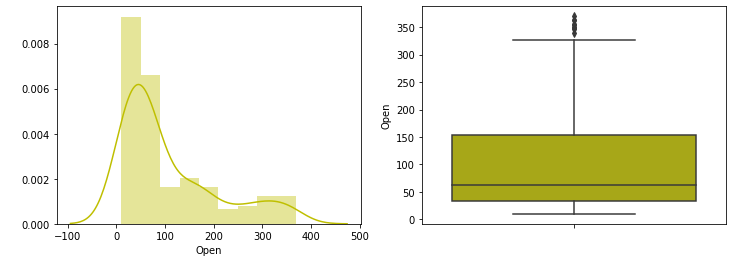

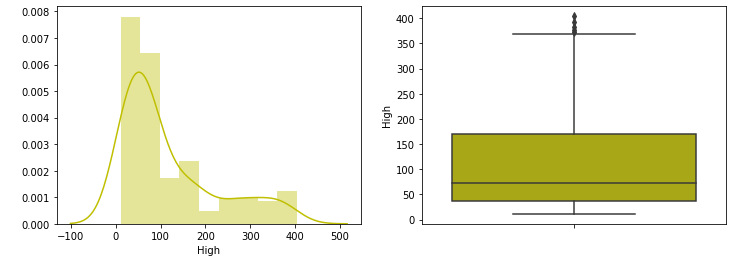

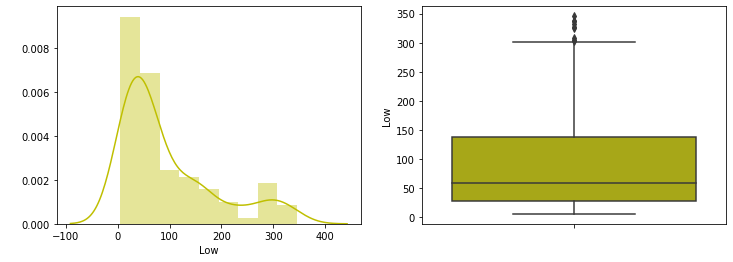

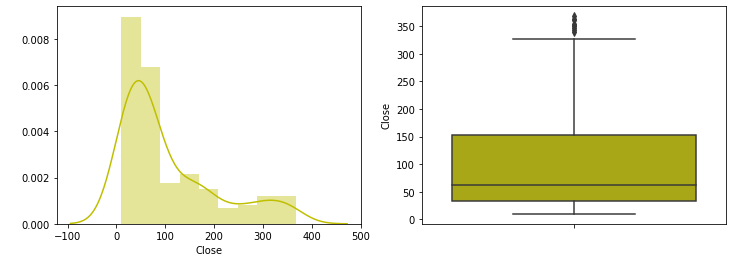

In [18]:
#plots histogram for numerical variables
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var], color="y")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var], color="y")
    fig.set_title('')
    fig.set_ylabel(var)

## **it is positively skewed**

###**when you looking this graph, this is not a perfect normal distribution, so we have to apply some kind of transformation to see it will look like a normal distribution or not.**

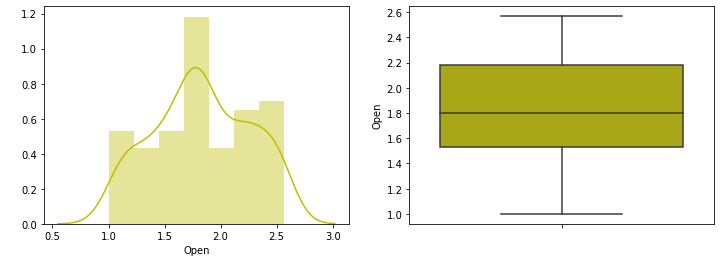

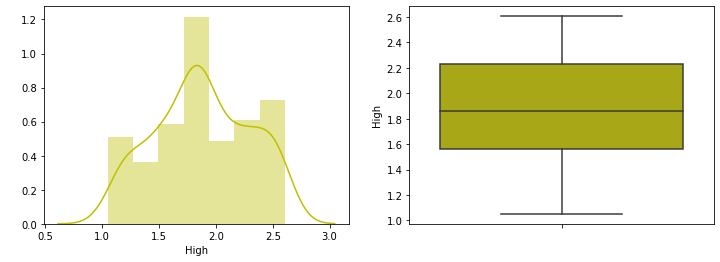

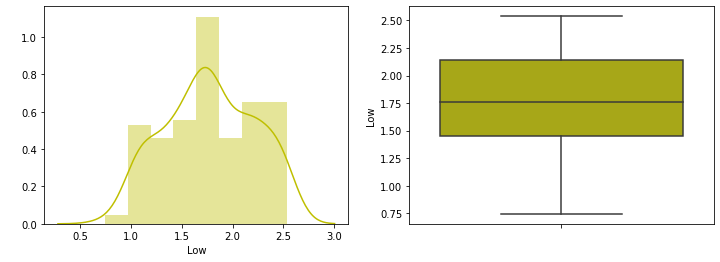

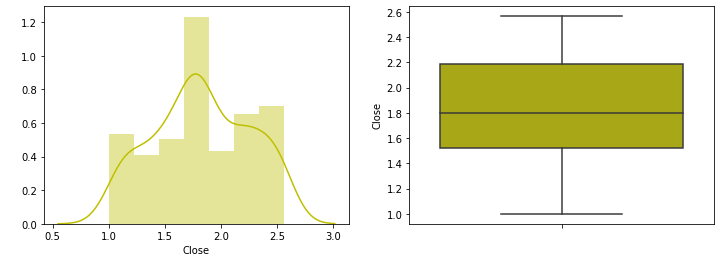

In [19]:
#Using log transform
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]), color="y")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers are there or not.
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]), color="y")   #numpy log10() is a mathematical function that is used to get the natural logarithm of any object or an array with the base 10
    fig.set_title('')
    fig.set_ylabel(var)

##**it is not perfectly normal distribution but more or less its looking normal distribution.**

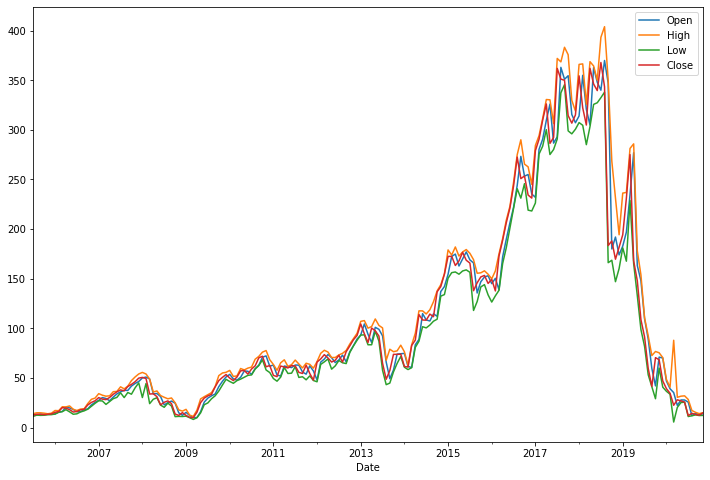

In [20]:
df.plot.line(figsize=(12, 8))

##**The line graph shows that the stock price of yes bank was actully fall from 2018 onwards which shows the impact of 2018 fraud case involving Rana Kapoor for which it has been in the news.**

In [21]:
# Date of maximum closing price
print('Maximum closing price:\n', df[df['Close']== df['Close'].max()])

# Date of minimum closing price
print('\n Minimum closing price:\n',df[df['Close']== df['Close'].min()])

Maximum closing price:
              Open    High     Low  Close
Date                                    
2018-07-01  340.0  393.35  332.45  367.9

 Minimum closing price:
             Open   High   Low  Close
Date                                
2009-03-01  10.0  11.24  8.16   9.98


In [22]:
# Creating a dependent variable i.e 'y'
dependent_variable = 'Close'

# Create a list of independent variables i.e x1,x2,x3,.....xn
# Pandas tolist() is used to convert a series to list.
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Open', 'High', 'Low']

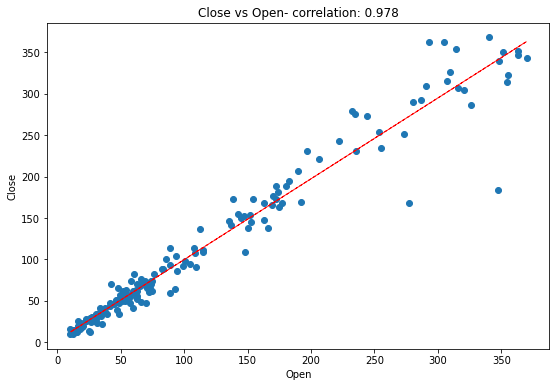

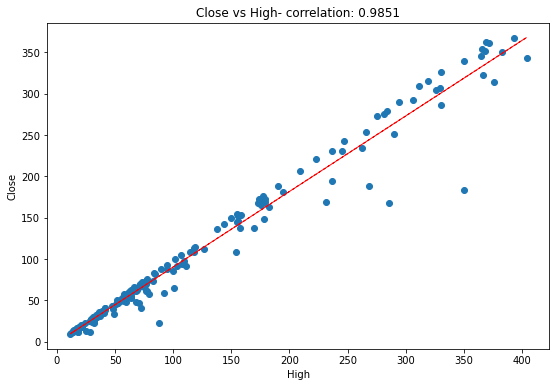

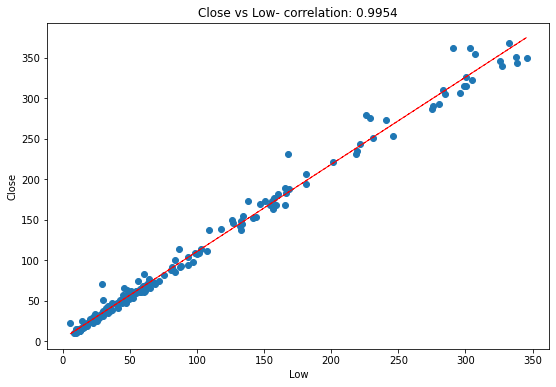

In [23]:
# Scatterplot between independent and dependent variable
for col in df.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))    #here col is an independent_variables and we added correlation also so that how much my correlation is the data
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

## **We can clearly say that all the independent variables are linearly affecting of our dependent variable that means there is a strong correlation between all the independent variables.**

## **Now, let see more better correlation between all the features in our dataset by using heatmap.**

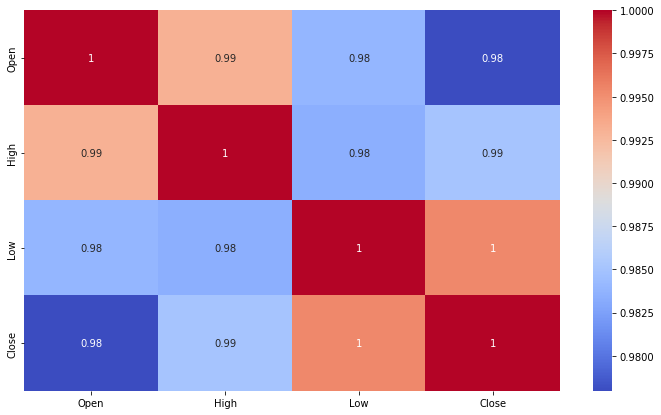

In [24]:
# Checking Correlation 
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **By seeing the heatmap we conclude that there is a high multicollinearity between each independent column.**  

In [25]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor          # here we importing VIF which is used for measure the amount of multicollinearity. 
def calc_vif(X):

    # Calculating VIF score
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


## **Here we see that we have have very high VIF score which means there is a high multicollinearity between these variables (the VIF score should be below 10 indicates  the more reliable your regression results are going to be.)**
## **Even we have high VIF score we cannot drop any feature because each vaiable is important in perspective of regression analysis.**

In [27]:
# Create a variable to predict 'n' Months for future
future_months = 3

###**We are training our models to predict prices of future by n months. Just we make a one way of predicton here.**

In [28]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
df['Prediction'] = df[['Close']].shift(-future_months)
df.head(10)

,Open,High,Low,Close,Prediction
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.99
2005-08-01,12.58,14.88,12.55,13.42,13.41
2005-09-01,13.48,14.87,12.27,13.30,13.71
2005-10-01,13.20,14.47,12.40,12.99,15.33
2005-11-01,13.35,13.88,12.88,13.41,16.12
2005-12-01,13.49,14.44,13.00,13.71,20.08
2006-01-01,13.68,17.16,13.58,15.33,19.49
2006-02-01,15.50,16.97,15.40,16.12,18.03
2006-03-01,16.20,20.95,16.02,20.08,15.62


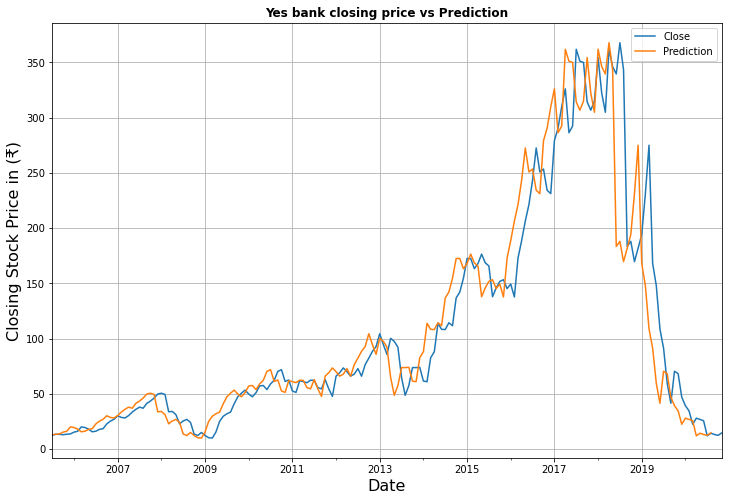

In [29]:
#Closing price vs prediction
df[['Close','Prediction']].plot.line(figsize=(12, 8))
plt.grid(True)
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

# **LINEAR REGRESSION**

In [69]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [32]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore            #zscore make your data normalize by putting mean as 0 and std deviation as 1.
X = df[independent_variables].apply(zscore)

In [35]:
#applying log on dependent variable 
y = np.log10(df['Close'])

In [36]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (148, 3)
X_test: (37, 3)
y_train: (148,)
y_test: (37,)


In [38]:
#Applying Linear Regression
regressor = LinearRegression()

In [39]:
#Fitting Multiple Linear Regression to the Training set
regressor.fit(X_train, y_train)        #inside this function fit() it will calculate loss,try multiple lines,gradient descent,finding the optimal values and ultimately it will gives the best fit line.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Checking efficiency of training model
regressor.score(X_train,y_train)

0.8090973296947443

In [42]:
regressor.intercept_       #  this is intercept i.e beta0

1.8262354887187733

In [49]:
regressor.coef_            # this is coefficient i.e beta 1,2,3,4,5,6.......till beta n

array([-0.13212634,  0.2897523 ,  0.2329089 ])

In [53]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred              #Predicting closing day on the test data

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

In [63]:
# Actual closing day on test data
y_test

Date
2008-04-01    1.532245
2015-12-01    2.162056
2019-12-01    1.671636
2014-11-01    2.152533
2010-08-01    1.793930
2007-01-01    1.479431
2016-12-01    2.364101
2006-02-01    1.207365
2005-12-01    1.137037
2019-01-01    2.288473
2018-03-01    2.484157
2019-07-01    1.960471
2015-11-01    2.185542
2011-06-01    1.795045
2018-06-01    2.530968
2019-03-01    2.439412
2010-10-01    1.856487
2008-08-01    1.428621
2017-01-01    2.445760
2010-01-01    1.697578
2009-03-01    0.999131
2014-09-01    2.048053
2019-05-01    2.170115
2010-07-01    1.770778
2016-06-01    2.344981
2019-10-01    1.847881
2016-09-01    2.399414
2005-11-01    1.127429
2014-07-01    2.034267
2011-01-01    1.720903
2018-08-01    2.535800
2017-07-01    2.558661
2012-09-01    1.883321
2015-03-01    2.213013
2007-09-01    1.616581
2010-02-01    1.675045
2016-10-01    2.404012
Name: Close, dtype: float64

In [60]:
# comparing actual and predicted closing price on the test dataset
compare_df = pd.DataFrame({'Actual_Price': y_test,'Predicted_Price': y_pred})

In [64]:
compare_df.head(10)

,Actual_Price,Predicted_Price
Date,,
2008-04-01,1.532245,1.532712
2015-12-01,2.162056,1.966852
2019-12-01,1.671636,1.610364
2014-11-01,2.152533,1.955914
2010-08-01,1.793930,1.667017
2007-01-01,1.479431,1.533074
2016-12-01,2.364101,2.320109
2006-02-01,1.207365,1.472351
2005-12-01,1.137037,1.461987


In [65]:
regressor.score(X_test,y_test)

0.8283441092652583

In [85]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error((y_test),(y_pred)),3)
print("MAE :", MAE)

MSE = round(mean_squared_error((y_test),(y_pred)),3)
print("MSE :", MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :", RMSE)

R2 = round(r2_score((y_test), (y_pred)),3)
print("R2 :" , R2)

Adjusted_R2 = round(1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2:", Adjusted_R2) 

MAE : 0.146
MSE : 0.032
RMSE : 0.179
R2 : 0.828
Adjusted R2: 0.813


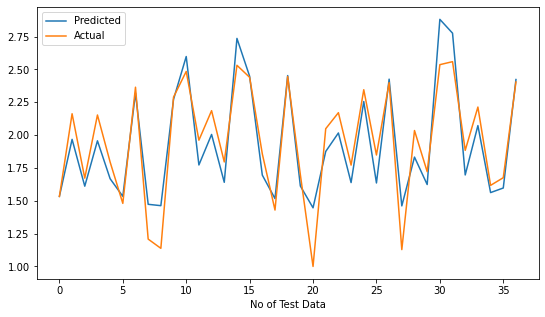

In [105]:
#actual-predicted values plot
plt.figure(figsize=(9,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Closing price')

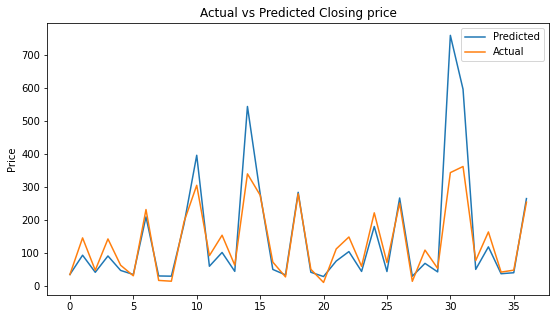

In [100]:
plt.figure(figsize=(9,5))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")


# **LASSO REGRESSION**